# Практическое занятие №3. Линейные модели

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

**Напоминание**

Модель линейной регрессии $f(X)$
$$f(X) = Xw$$

Функция риска
$$Q(X) = |y - Xw|^2$$

Аналитическое решение 
$$w^* = (X^TX)^{-1}X^Ty$$

## Реализация аналитического решения и сравнение с sklearn. Базовый случай с 1 признаком

In [3]:
# сгенерируем простой датасет с одним признаком
n_objects = 100

linear_func = lambda x:  3.2 * x + 8
# def linear_func(x):
# return 3.2 * x + 8

X = np.linspace(-10, 10, n_objects)
y = linear_func(X) + np.random.randn(n_objects) * 5

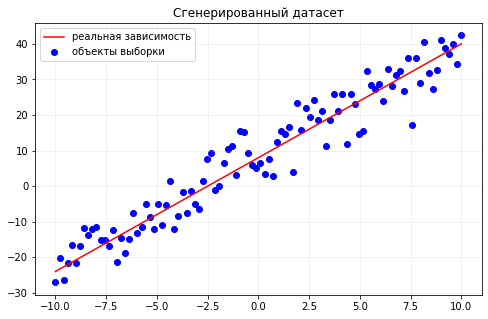

In [4]:
# посмотрим на датасет
plt.figure(figsize=(8, 5))
plt.plot(X, linear_func(X), label='реальная зависимость', c='red')
plt.scatter(X, y, label='объекты выборки', c='b')

plt.title("Сгенерированный датасет")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [5]:
# класс линейной регрессии с помощью аналитического решения
class DummyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        """
        фукнкция обучения - вычисляет параметры модели (веса) по данной выборке
        
        Inputs:
        X - матрица признаков
        y - вектор ответов
        
        Outputs:
        self - модель
        """
        
        n, k = X.shape
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((np.ones((n, 1)), X))

        self.w = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), y)
        
        return self
        
    def predict(self, X):
        """
        функция предсказания - предсказывает ответы модели по данной выборке
        
        Inputs:
        X - матрица признаков
        
        Outputs:
        y_pred - предсказания
        """
        
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((np.ones((n, 1)), X))

        y_pred = np.dot(X_train, self.w)

        return y_pred
    
    def get_weights(self):
        return self.w

In [6]:
# разделим датасет на обучающую и тестовую выборки 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

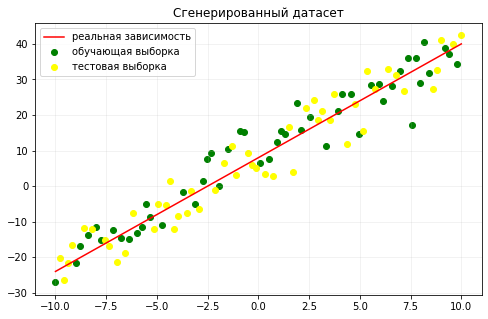

In [7]:
# посмотрим на выборки
plt.figure(figsize=(8, 5))
plt.plot(X, linear_func(X), label='реальная зависимость', c='red')
plt.scatter(X_train, y_train, label='обучающая выборка', c='g')
plt.scatter(X_test, y_test, label='тестовая выборка', c='yellow')

plt.title("Сгенерированный датасет")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [8]:
# X_train и X_test - должны быть матрицами! признаков
print(X_train.shape)
print(X_train[:, np.newaxis].shape)

(50,)
(50, 1)


In [9]:
X_train

array([  8.18181818,   0.50505051,   6.96969697,   7.57575758,
         7.97979798,  -5.75757576,   0.1010101 ,  -8.98989899,
         6.56565657,  -1.51515152,   7.77777778,  -3.73737374,
         2.52525253,   2.12121212,   5.55555556,  -5.55555556,
        -2.32323232,   7.37373737,   9.19191919,  -7.97979798,
         3.33333333,   3.93939394,   9.7979798 , -10.        ,
         1.11111111,  -0.70707071,   4.94949495,  -2.72727273,
         4.54545455,  -1.91919192,  -6.36363636,  -5.35353535,
        -5.95959596,   4.14141414,   1.91919192,  -8.78787879,
        -7.17171717,  -4.74747475,  -7.77777778,   0.90909091,
        -8.38383838,   1.31313131,   8.38383838,  -3.13131313,
        -2.52525253,  -0.90909091,   6.16161616,   5.95959596,
         9.39393939,  -6.76767677])

In [10]:
# тестируем нашу модель
custom_linear_regressor = DummyLinearRegression()

custom_linear_regressor.fit(X_train[:, np.newaxis], y_train)

custom_predictions = custom_linear_regressor.predict(X_test[:, np.newaxis])
w = custom_linear_regressor.get_weights()

print(w)

[9.09493064 3.04264039]


In [11]:
# тестируем модель из коробки - sklearn
# документация https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression

sklearn_linear_regressor = LinearRegression()

sklearn_linear_regressor = sklearn_linear_regressor.fit(X_train[:, np.newaxis], y_train)

sklearn_predictions = sklearn_linear_regressor.predict(X_test[:, np.newaxis])

w = sklearn_linear_regressor.coef_
w_0 = sklearn_linear_regressor.intercept_

print(w_0, w)

9.09493063799281 [3.04264039]


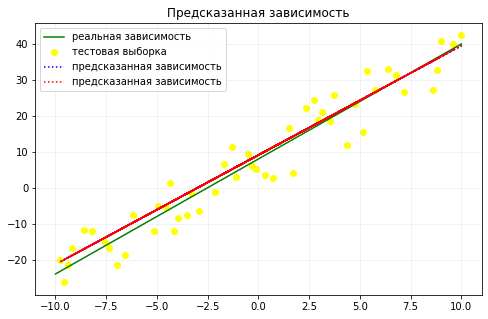

In [12]:
# нарисуем модели
plt.figure(figsize=(8, 5))
plt.plot(X, linear_func(X), label='реальная зависимость', c='g')

plt.scatter(X_test, y_test, label='тестовая выборка', c='yellow')

plt.plot(X_test, custom_predictions, label='предсказанная зависимость', c='blue', linestyle=':')
plt.plot(X_test, sklearn_predictions, label='предсказанная зависимость', c='red', linestyle=':')

plt.title("Предсказанная зависимость")
plt.grid(alpha=0.2)
plt.legend()
plt.show()

## Скоррелированные признаки. Регуляризация

In [13]:
n_features = 3
n_objects = 300

eps = 1e-3

X = np.random.uniform(-5, 5, (n_objects, n_features))

# сделаем 2ой и 3и1 признак сильно скоррелированными
X[:, -1] = X[:, -2] + np.random.uniform(-eps, eps, X[:, -2].shape)

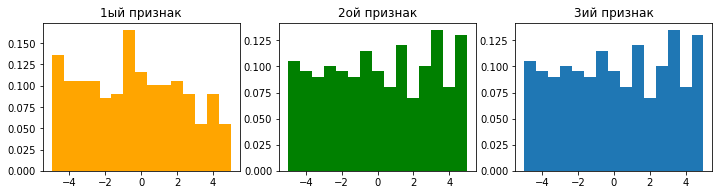

In [14]:
# смотрим на признаки
plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.hist(X[:, 0], 15, density=True, color='orange')
plt.title('1ый признак')

plt.subplot(232)
plt.hist(X[:, 1], 15, density=True, color='green')
plt.title('2ой признак')

plt.subplot(233)
plt.hist(X[:, 2], 15, density=True)
plt.title('3ий признак')

plt.show()

In [15]:
# реальный вектор весов
w_true = np.random.normal(size=(n_features + 1, ))
w_true[0] = 0

y = np.hstack((np.ones((n_objects, 1)), X)).dot(w_true) + np.random.normal(0, 1, (n_objects))

w_true

array([ 0.        ,  0.36022045, -1.06135683, -1.20429528])

In [16]:
# предсказанный вектор весов
custom_linear_regressor = DummyLinearRegression().fit(X, y)

custom_linear_regressor.get_weights()

array([ 1.25032064e-03,  3.90744532e-01,  2.31637138e+01, -2.54687741e+01])

**Напоминание**

Функция риска с L2 регуляризацией
$$Q(X) = |y - Xw|^2 + \lambda^2|w|^2$$

Аналитическое решение с L2 регуляризацией
$$\hat{w} = (X^TX + \lambda^2E)^{-1}X^Ty$$

In [17]:
X.shape

(300, 3)

In [18]:
np.hstack((np.ones((300, 1)), X)).shape

(300, 4)

In [19]:
np.hstack((np.ones((300, 1)), X, X))

array([[ 1.        , -3.17835016,  3.33911648, ..., -3.17835016,
         3.33911648,  3.33984937],
       [ 1.        , -0.68476201,  1.51345301, ..., -0.68476201,
         1.51345301,  1.51295971],
       [ 1.        , -3.94373482,  4.50569523, ..., -3.94373482,
         4.50569523,  4.50569223],
       ...,
       [ 1.        , -2.57504551,  2.75394287, ..., -2.57504551,
         2.75394287,  2.7546952 ],
       [ 1.        , -2.71089192, -3.54129014, ..., -2.71089192,
        -3.54129014, -3.54065907],
       [ 1.        , -0.35569881,  3.27972484, ..., -0.35569881,
         3.27972484,  3.28017969]])

In [20]:
# класс линейной регрессии с помощью аналитического решения c регуляризацией
class DummyLinearRegressionWithRegularization(DummyLinearRegression):
    def __init__(self, fit_intercept=True):
        super().__init__(fit_intercept)

    def fit_with_l2(self, X, y):
        """
        функция обучения - вычисляет параметры модели (веса) по данной выборке, c учетом регуляризации
        
        Inputs:
        X - матрица признаков
        y - вектор ответов
        
        Outputs:
        self - модель
        """
        
        # 1 a11 a12 a13 * (w0, w1, w2, w3)
        # 1 a21 ...
        # 1 a31 ...
        
        n, k = X.shape
        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((np.ones((n, 1)), X))
            
        # X_train - n, k + 1
        # X.shape[1] = k
        # X_train.shape[1] = k + 1
        # 1 a11 a12 a13
        # 1
        # 1
        # X_train.T * X_train -> k + 1, k + 1
        l = 1

        self.w = np.linalg.inv(X_train.T @ X_train + l * np.eye(k + 1)) @ X_train.T @ y
        return self

Функция риска с L2 регуляризацией
$$Q(X) = |y - Xw|^2 + \lambda^2|w|^2$$

Аналитическое решение с L2 регуляризацией
$$\hat{w} = (X^TX + \lambda^2E)^{-1}X^Ty$$

In [21]:
# предсказанный вектор весов с регуляризацией
custom_linear_regressor = DummyLinearRegressionWithRegularization().fit_with_l2(X, y)

custom_linear_regressor.get_weights()

array([-4.00723249e-04,  3.90457940e-01, -1.15114303e+00, -1.15349899e+00])

In [22]:
w_true

array([ 0.        ,  0.36022045, -1.06135683, -1.20429528])

## Решаем настоящую задачу

In [23]:
# о датасете https://archive.ics.uci.edu/ml/datasets/Automobile

In [24]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

In [25]:
headers=["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
        "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders",
         "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
         "highway-mpg", "price"]

In [26]:
df.columns = headers

In [27]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Смотрим на данные

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

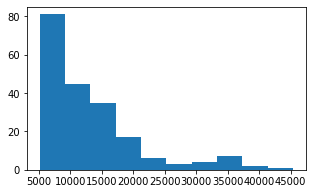

In [29]:
# распределение числовой фичи
plt.figure(figsize=(5, 3))
plt.hist(df["price"], bins=10)
plt.show()

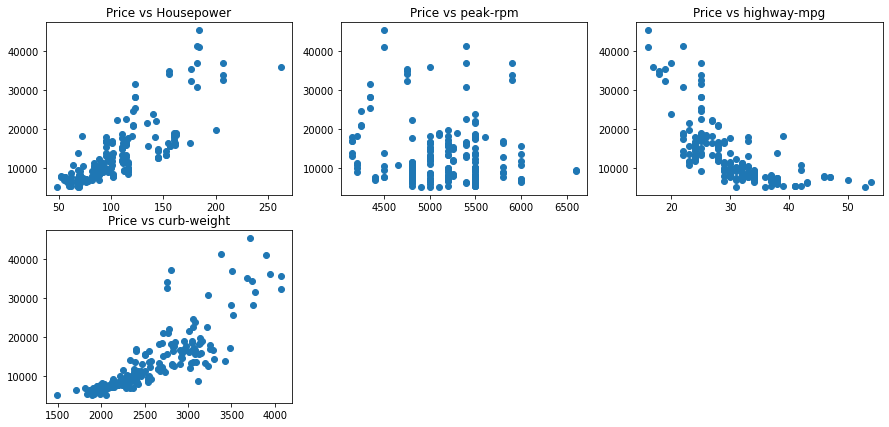

In [30]:
# соотношение таргета и разных числовых фичей
plt.figure(figsize=(15, 7))

plt.subplot(231)
plt.scatter(df["horsepower"], df["price"])
plt.title("Price vs Housepower")

plt.subplot(232)
plt.scatter(df["peak-rpm"], df["price"])
plt.title("Price vs peak-rpm")

plt.subplot(233)
plt.scatter(df["highway-mpg"], df["price"])
plt.title("Price vs highway-mpg")

plt.subplot(234)
plt.scatter(df['curb-weight'], df["price"])
plt.title("Price vs curb-weight")

plt.show()

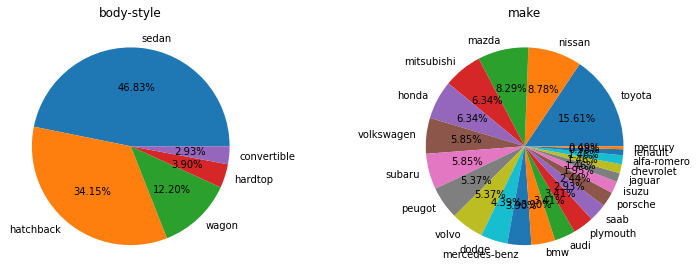

In [31]:
# распределение категорийных фичей
plt.figure(figsize = (20,10))

plt.subplot(231)
plt.pie(df['body-style'].value_counts(), labels = df['body-style'].value_counts().index, autopct = '%1.2f%%')
plt.title('body-style')

plt.subplot(232)
plt.pie(df['make'].value_counts(), labels = df['make'].value_counts().index, autopct = '%1.2f%%')
plt.title('make')

plt.show()

### Предобработка данных

**Работа с пропущенными значениями**

In [32]:
# проверка пропусков
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [33]:
# маска для категорийных признаков - они имеют тип object
cat_features_mask = (df.dtypes == "object").values

In [34]:
# численные значения
df_num = df[df.columns[~cat_features_mask]]
df_num.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [35]:
# вариант 1 - заменяем пропущенные числовые значения нулями
df_num_no_1 = df_num.fillna(0)
df_num_no_1.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,0.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,0.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [36]:
# вариант 2 - заменяем пропущенные числовые значения средними
from sklearn import impute

replacer = impute.SimpleImputer(strategy="mean")
df_num_no_2 = pd.DataFrame(data=replacer.fit_transform(df_num), columns=df_num.columns)

df_num_no_2.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [37]:
# категорийные значения - заменим пустыми строками
df_cat_no = df[df.columns[cat_features_mask]].fillna("")
df_cat_no.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [38]:
# все признаки вместе
df_no = pd.concat([df_num_no_2, df_cat_no], axis=1)
df_no.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [39]:
# перед предобработкой сразу отделим таргет
# y - вектор с ценой, df - остальные признаки
y = df_no['price']
df_no = df_no.drop(['price'], axis=1)

**Преобразование нечисловых значений**

In [40]:
# a b c -> 3
# values
# a  1
# b  2
# c  3
# a  1

# values_a values_b values_c
# 1          0        0
# 0          1        0
# 0          0        1
# 1          0        0

In [41]:
# w_i
# k1 w1 + k2w2 + ... + k_10 w_10 + ... + w_100000 = y1
# m1 w1 + m2 w2 + ... + m10 w_10 = y2

...
#                                = y200

Ellipsis

In [42]:
df_no.shape

(205, 25)

In [45]:
df_dum = pd.get_dummies(df_no, drop_first=True)
df_dum.shape

(205, 66)

In [46]:
df_dum.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


**Добавление новых признаков**

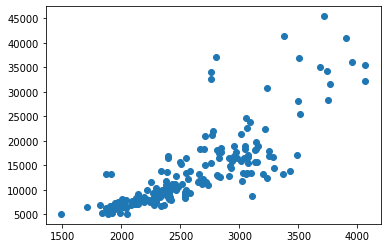

In [377]:
# на какую функцию похожа зависимость от curb-weight?
plt.scatter(df_dum['curb-weight'], y)

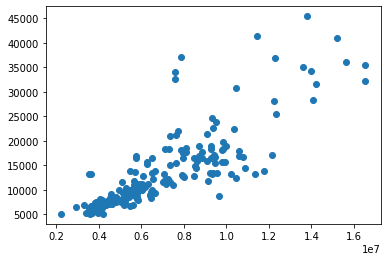

In [378]:
plt.scatter(df_dum['curb-weight'] ** 2, y)

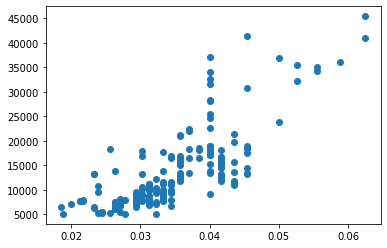

In [383]:
# а на что похожа зависимость от highway-mpg?
# 1 / x
plt.scatter(1 / (df_dum['highway-mpg'] + 0.0001), y)

In [384]:
# заменим фичи
df_dum['curb-weight'] = df_dum['curb-weight'] ** 2
df_dum['highway-mpg'] = 1 / (df_dum['highway-mpg'] + 0.0001)

**Масштабирование признаков**

In [49]:
# способ 1 - нормализация
# документация https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()
df_norm1 = normalizer.fit_transform(df_dum)
df_norm1

array([[ 1.74347043,  0.        , -1.6907718 , ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.74347043,  0.        , -1.6907718 , ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 0.133509  ,  0.        , -0.70859588, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [-1.47645244, -0.85433189,  1.72187336, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.47645244, -0.85433189,  1.72187336, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [-1.47645244, -0.85433189,  1.72187336, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

In [50]:
# способ 2 - MinMaxScaler
# документация https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
normalizer = preprocessing.MinMaxScaler()
df_norm2 = normalizer.fit_transform(df_dum)
df_norm2

# (a - 0) / 1 = a 
# 1

array([[1.        , 0.29842932, 0.05830904, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29842932, 0.05830904, ..., 1.        , 0.        ,
        0.        ],
       [0.6       , 0.29842932, 0.2303207 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.15706806, 0.65597668, ..., 1.        , 0.        ,
        0.        ],
       [0.2       , 0.15706806, 0.65597668, ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.15706806, 0.65597668, ..., 1.        , 0.        ,
        0.        ]])

In [51]:
df_norm = pd.DataFrame(df_norm2)
df_norm.columns = df_dum.columns
df_norm.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
# сброс нумерации индексов
df_norm = df_norm.reset_index(drop=True)


NameError: name 'df_norm' is not defined

**Обучение модели**

In [388]:
X = df_norm

In [389]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

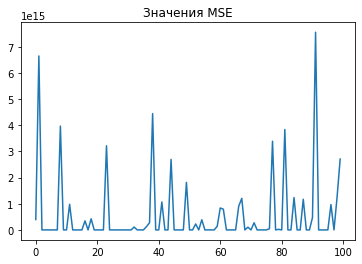

In [396]:
# запустим модель 100 раз и посмотрим на метрику MSE
mses = []
maes = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test, lr.predict(X_test)))
    maes.append(mean_absolute_error(y_test, lr.predict(X_test)))
    
plt.plot(np.arange(100), maes)
plt.title('Значения MSE')
plt.show()

In [391]:
# и еще пару раз, пока не получим плохой результат
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

lr = LinearRegression()
lr.fit(X_train, y_train)

print('MSE', mean_squared_error(y_test, lr.predict(X_test)))

MSE 6.054498727284504e+30


In [ ]:
# 1 - когда коэфф большой, на трейне все значения фичи 0, а в тесте есть 1
# 2 - когда коэфф1 большой и коэфф2 и противоположные, на трейне фича1 и фича всегда принимают одинаковые значени, а на тесте разные

In [392]:
# почему так плохо?

# найдем фичи, которые не меняются в train
for i in range(X_train.shape[1]):
    if min(X_train.values[:, i]) - max(X_train.values[:, i]) == 0 and max(X_train.values[:, i]) == 0:
        print(i)

24


In [394]:
max(X_test.values[:, i])

0.0

In [393]:
# посмотрим вес этих фичей
lr.coef_[24]

-1.5755457715304612e+16

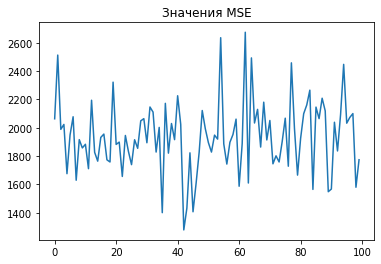

In [398]:
# решение - и снова регуляризация!!
from sklearn.linear_model import Ridge

# запустим модель 100 раз и посмотрим на метрику MSE
mses = []
maes = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    lr_l2 = Ridge()
    lr_l2.fit(X_train, y_train)
    mses.append(mean_squared_error(y_test, lr_l2.predict(X_test)))
    maes.append(mean_absolute_error(y_test, lr_l2.predict(X_test)))
    
plt.plot(np.arange(100), maes)
plt.title('Значения MSE')
plt.show()

In [ ]:
# 205 * 0.3 = примерно 60

# 5000 - 45000
# 1000 * 1000 = 10^6 * 10 = 10^7

In [ ]:
# попробуйте применить модель с l1-регуляризацией
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html